# Sample release for GW190814

This notebook serves as a basic introduction to loading and viewing data released in associaton with the publication titled **GW190814: Gravitational Waves from the Coalescence of a 23 Solar Mass Black Hole with a 2.6 Solar Mass Compact Object** available through the [DCC](https://dcc.ligo.org/LIGO-P190814).

The released data file can be read in using the PESummary or h5py libraries. For this notebook we'll start with simple stuff using h5py. Then we'll use PESummary v0.6.0 to read the data files as well as for plotting. For general instructions on how to manipulate the data file and/or read this data file with h5py, see the [PESummary docs](https://lscsoft.docs.ligo.org/pesummary/)

In [3]:
# import useful python packages
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import h5py

approximants: <KeysViewHDF5 ['C01:IMRPhenomD', 'C01:IMRPhenomHM', 'C01:IMRPhenomNSBH', 'C01:IMRPhenomPv3HM', 'C01:SEOBNRv4HM_ROM', 'C01:SEOBNRv4PHM', 'C01:SEOBNRv4_ROM', 'C01:SEOBNRv4_ROM_NRTidalv2_NSBH', 'combined', 'history', 'version']>
Top-level data structures: <KeysViewHDF5 ['approximant', 'calibration_envelope', 'config_file', 'injection_data', 'meta_data', 'posterior_samples', 'priors', 'psds', 'version']>
data structures in posterior_samples: [('recalib_L1_frequency_6', '<f8'), ('recalib_V1_phase_2', '<f8'), ('V1_matched_filter_abs_snr', '<f8'), ('recalib_H1_phase_2', '<f8'), ('recalib_V1_amplitude_0', '<f8'), ('log_likelihood', '<f8'), ('recalib_L1_phase_1', '<f8'), ('recalib_V1_phase_9', '<f8'), ('recalib_H1_frequency_7', '<f8'), ('recalib_L1_frequency_2', '<f8'), ('recalib_V1_amplitude_8', '<f8'), ('recalib_H1_amplitude_0', '<f8'), ('recalib_H1_frequency_2', '<f8'), ('recalib_L1_phase_5', '<f8'), ('spin_1y', '<f8'), ('V1_matched_filter_snr_angle', '<f8'), ('peak_luminosity'

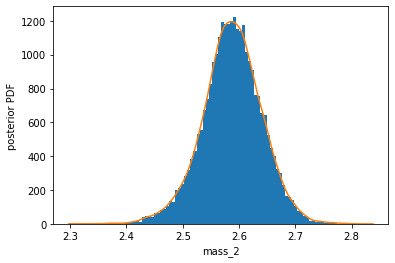

In [4]:
# read in the data
fn = "GW190814_posterior_samples.h5"
data = h5py.File(fn,'r')

# print out parametrized waveform family names ("approximants" in LIGO jargon).
print('approximants:',data.keys())

# print out top-level data structures for one approximant. Here fore example we use the combined samples
# between IMRPhenomPv3HM and SEOBNRv4PHM. The data structure is the same for all approximants.
print('Top-level data structures:',data['combined'].keys())

# extract posterior samples for one of the approximants
posterior_samples = data['combined']['posterior_samples']
print('data structures in posterior_samples:',posterior_samples.dtype)
pnames = [item for item in posterior_samples.dtype.names]
print('parameter names:',pnames)

# get samples for one of the parameters
m2 = posterior_samples['mass_2_source']
print('mass_2 shape, mean, std =',m2.shape,m2.mean(),m2.std())

# smooth it
from scipy.stats.kde import gaussian_kde
hs = gaussian_kde(m2)

# histogram, and overlay the smoothed PDF
plt.figure()
h, b, o = plt.hist(m2,bins=100)
hsmoothed = hs(b)*len(m2)*(b[1]-b[0])
plt.plot(b,hsmoothed)
plt.xlabel('mass_2')
plt.ylabel('posterior PDF')
plt.show()

data.close()

# release memory for the data
#del data

Now use PESummary v0.6.0 to read the data files as well as for plotting.

In [6]:
# import ligo-specific python packages. 
# pesummary is a ligo-specific python package for reading and plotting the results of Bayesian parameter estimation.
# Install with "pip install pesummary" , and make sure you have version >= 0.6.0.
import pesummary
from pesummary.io import read
print(pesummary.__version__)

0.6.0


There are 8 different approximants that were used to analyze GW190814 plus the combined samples of IMRPhenomPv3HM and SEOBNRv4PHM. They are all stored in the data file.

In [7]:
fn = "GW190814_posterior_samples.h5"
data = read(fn)
labels = data.labels
print(labels)

['C01:IMRPhenomD', 'C01:IMRPhenomHM', 'C01:IMRPhenomNSBH', 'C01:IMRPhenomPv3HM', 'C01:SEOBNRv4HM_ROM', 'C01:SEOBNRv4PHM', 'C01:SEOBNRv4_ROM', 'C01:SEOBNRv4_ROM_NRTidalv2_NSBH', 'combined']


To illustrate the data structure we pick the combined posteriors and plot the respective data.

In [29]:
samples_dict = data.samples_dict
posterior_samples = samples_dict["combined"]
# prior samples for the combined run are the same as the IMRPhenomPv3HM run
prior_samples = data.priors["samples"]["C01:IMRPhenomPv3HM"]
parameters = posterior_samples.keys()
print(parameters)

dict_keys(['recalib_L1_frequency_6', 'recalib_V1_phase_2', 'V1_matched_filter_abs_snr', 'recalib_H1_phase_2', 'recalib_V1_amplitude_0', 'log_likelihood', 'recalib_L1_phase_1', 'recalib_V1_phase_9', 'recalib_H1_frequency_7', 'recalib_L1_frequency_2', 'recalib_V1_amplitude_8', 'recalib_H1_amplitude_0', 'recalib_H1_frequency_2', 'recalib_L1_phase_5', 'spin_1y', 'V1_matched_filter_snr_angle', 'peak_luminosity', 'recalib_L1_frequency_0', 'final_spin', 'recalib_H1_frequency_5', 'V1_optimal_snr', 'recalib_L1_amplitude_2', 'psi', 'phi_2', 'chi_2_in_plane', 'recalib_V1_frequency_3', 'recalib_H1_frequency_9', 'recalib_V1_phase_0', 'recalib_H1_phase_8', 'recalib_H1_frequency_4', 'recalib_V1_amplitude_1', 'recalib_V1_phase_5', 'recalib_V1_phase_7', 'spin_1z', 'recalib_H1_phase_0', 'recalib_H1_amplitude_4', 'network_matched_filter_snr', 'mass_2', 'recalib_L1_amplitude_3', 'recalib_H1_phase_4', 'chi_eff', 'H1_time', 'spin_1x', 'cos_iota', 'recalib_L1_phase_6', 'recalib_L1_frequency_1', 'recalib_L1_p

As an example, we'll show the different posterior distributions derived for a single waveform and the posterior distribution derived using the different approximants for the mass_2_source parameter.

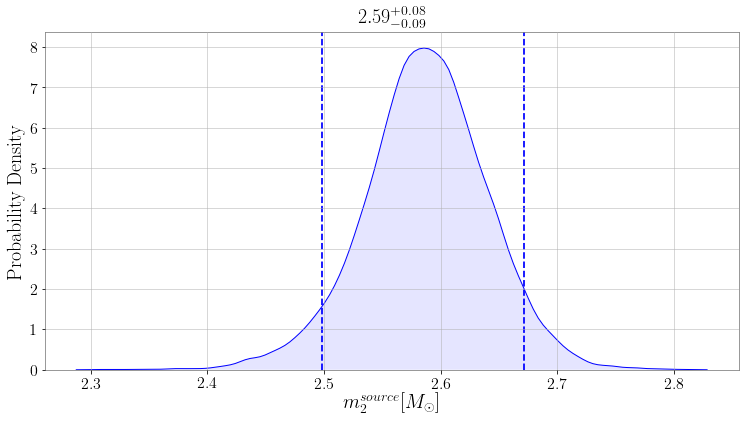

In [56]:
from pesummary.gw.plots.latex_labels import GWlatex_labels

parameter = "mass_2_source"
latex_label = GWlatex_labels[parameter]

fig = posterior_samples.plot(parameter, type="hist", kde=True)
fig.set_size_inches(12, 8)
plt.show()

In [12]:
sanitized_labels = [l.replace('_', '\_') for l in labels]

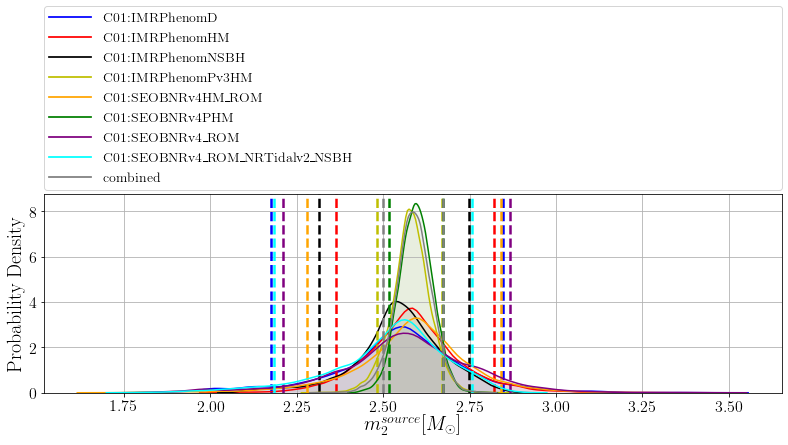

In [13]:
from pesummary.core.plots.plot import _1d_comparison_histogram_plot

samples = []
for label in labels:
    samples.append(samples_dict[label][parameter])


colors = ['b', 'r', 'k', 'y', 'orange', 'g','purple','cyan','grey','violet']
fig = _1d_comparison_histogram_plot(parameter, samples, colors, latex_label, sanitized_labels, kde=True)
fig.set_size_inches(12, 8)
plt.show()

Make a corner plot:

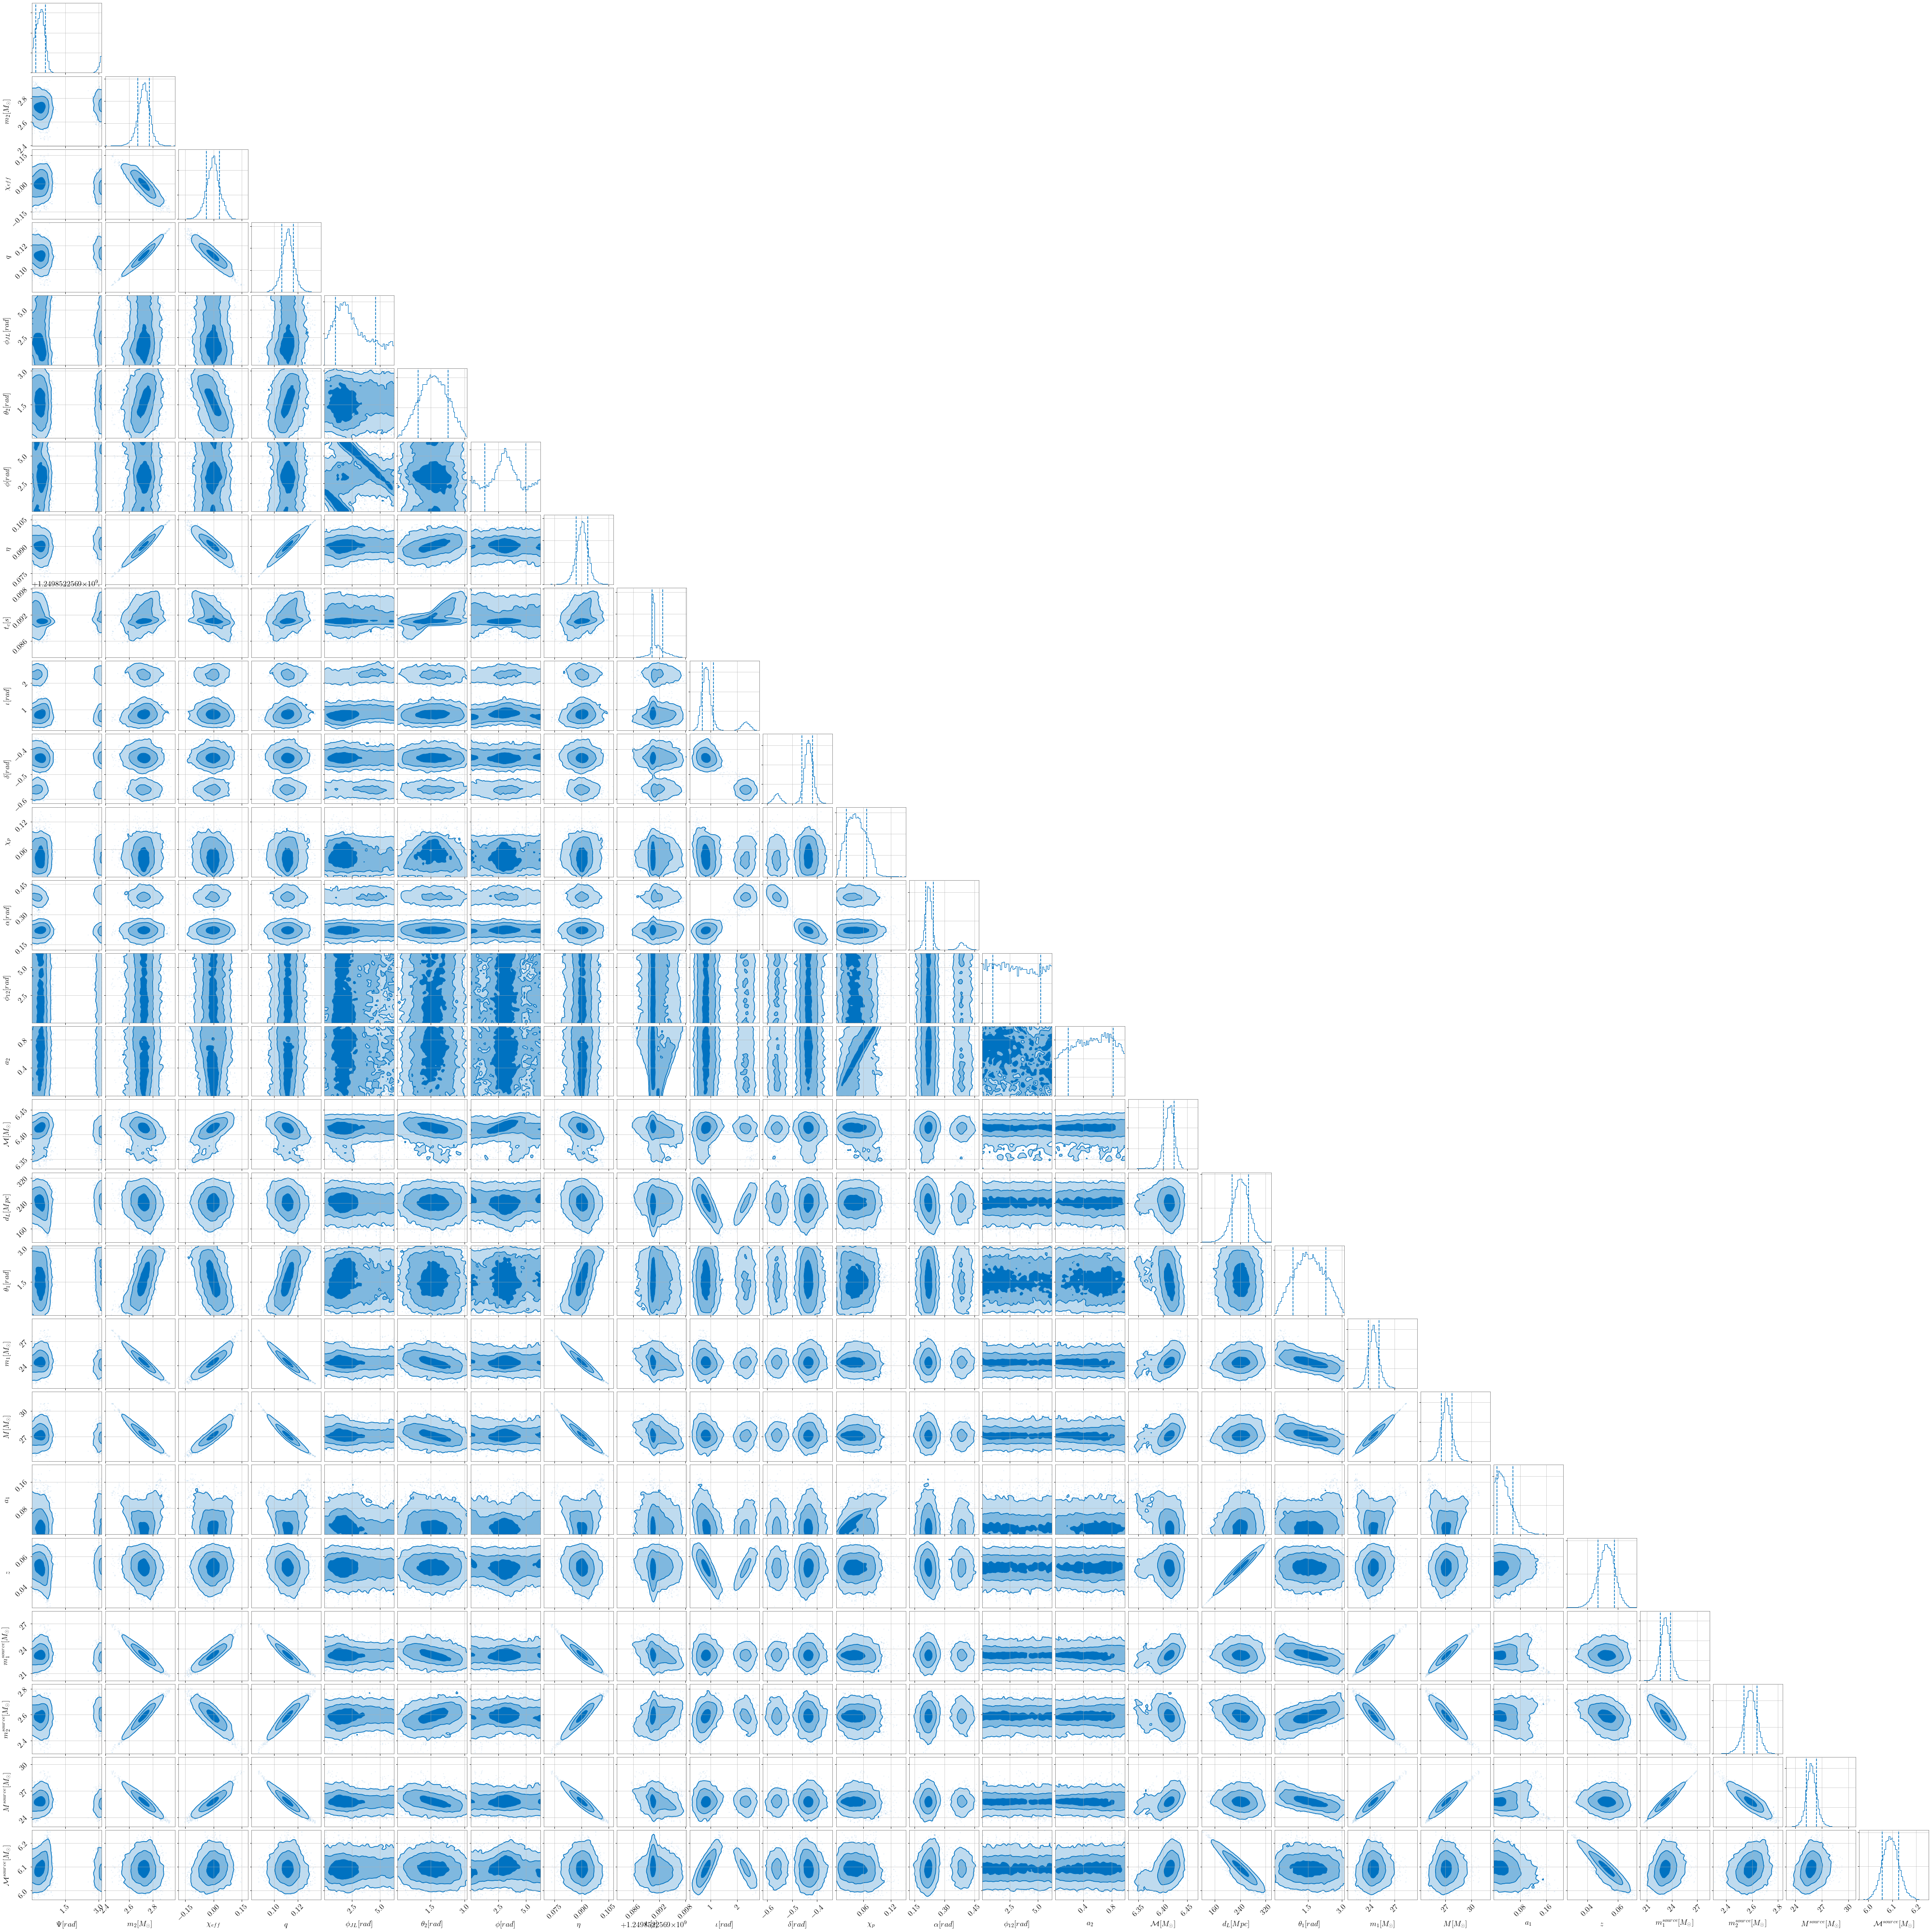

In [14]:
from pesummary.gw.plots.plot import _make_corner_plot

fig = _make_corner_plot(posterior_samples, GWlatex_labels)
plt.show()

The psds that were used for each analysis can also be extracted from this file and plotted

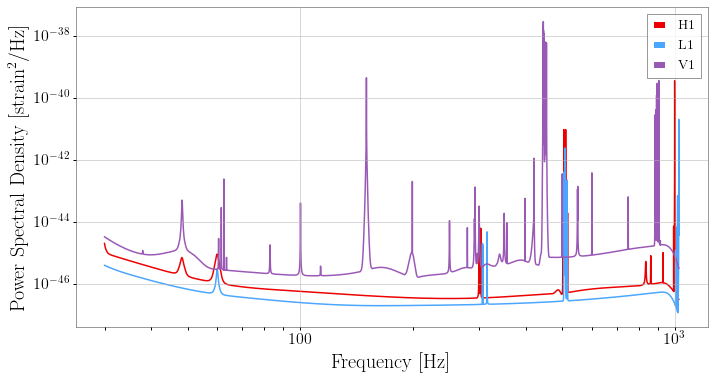

In [57]:
psd = data.psd["combined"]
fig = psd.plot(fmin=30.0)
fig.set_size_inches(12, 8)
plt.show()